In [2]:
import os
import numpy as np
import skimage as ski
from skimage import io, color, filters, measure
from skimage import morphology

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square, remove_small_objects

In [3]:
filename_PML = os.path.join(ski.data_dir, '/Users/zg/Mammouth/PROJECTS/Analysis/Image_Choice/MAX_PMLwt_20_MMStack_Pos0.ome-1-Nuc.tif')
PML = ski.io.imread(filename_PML)

In [4]:
# Convert to grayscale if necessary
if PML.ndim == 3:
    PML = color.rgb2gray(image)

# Apply thresholding to segment nuclei
thresh = filters.threshold_otsu(PML)
binary = PML > thresh

# Remove small objects and label regions
cleaned_binary = morphology.remove_small_objects(binary, min_size=50)
labeled_nuclei = measure.label(cleaned_binary)

# Count the number of segmented nuclei
num_nuclei = np.max(labeled_nuclei)

# Measure area of each nucleus
props = measure.regionprops(labeled_nuclei)
areas = [prop.area for prop in props]

# Calculate average segment area
avg_area = np.mean(areas)

print("Number of segmented nuclei:", num_nuclei)
print("Average segment area:", avg_area)

Number of segmented nuclei: 12
Average segment area: 9332.25


In [5]:
num_nuclei
areas

[16145.0,
 143.0,
 20303.0,
 17108.0,
 9032.0,
 266.0,
 13929.0,
 159.0,
 492.0,
 16404.0,
 9230.0,
 8776.0]

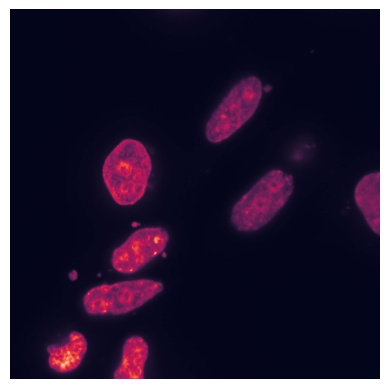

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your TIFF image file
image_path = ('/Users/zg/Mammouth/PROJECTS/Analysis/Image_Choice/MAX_PMLwt_20_MMStack_Pos0.ome-1-Nuc.tif')

# Load the image
image = mpimg.imread(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [7]:
import seaborn as sns

sns.set_theme(style="whitegrid")

#Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Property', y='Value', data=areas)

# Add labels and title
plt.xlabel('Nuclea')
plt.ylabel('Surface')
plt.title('Violin Plot of Region Properties')

plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.

<Figure size 1000x600 with 0 Axes>